In [1]:
# Data Exploration
import numpy as np
import pandas as pd

from numpy.random import randn

# Modeling
import statsmodels.api as sm
import scipy.stats as stats

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

import math

from sklearn.linear_model import LinearRegression

from sklearn import metrics

import statsmodels.api as sm

from pprint import pprint

In [2]:
# get data
from acquire import get_iris_data
df = get_iris_data()


In [3]:
# Split data into train (70%) & test (30%) samples. You should end with 2 data frames: train_df and test_df
train_df, test_df = train_test_split(df, test_size=.30, random_state=123)


In [22]:
# Create a swarmplot where the x-axis is each of the independent variable names (petal_length, petal_width, etc). The y-axis is the value of the variable. 
# Use color to represent species as another dimension. Hint: You will to 'melt' the dataframe into a 'long' dataframe in order to accomplish this. 
#What are your takeaways from this visualization?
# THE VIRGINICA SPECIES HAS LARGER MEASUREMENTS OVERALL EXCEPT FOR SEPAL WIDTH
# THE SETOSA SPECIES HAS LOWER MEASUREMENTS OVERALL EXCEPT FOR THE SEPAL WIDTH, WHICH IS THE HIGHEST COMPARED TO OTHER SPECIES.


train_df.head()

df_melted = pd.melt(train_df, id_vars=['species_name'], value_vars=('sepal_length','sepal_width','petal_length','petal_width'), var_name='measurement in cm')
df_melted.head()


,species_name,measurement in cm,value
0,virginica,sepal_length,5.8
1,virginica,sepal_length,6.3
2,versicolor,sepal_length,5.5
3,setosa,sepal_length,5.1
4,setosa,sepal_length,4.4


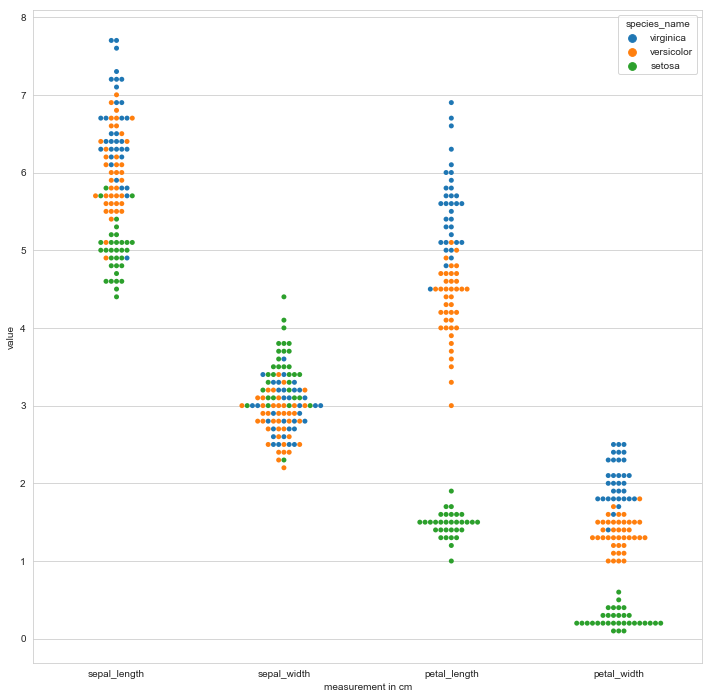

In [24]:

plt.figure(figsize=(12,12))
sns.swarmplot(x="measurement in cm", y='value', data=df_melted, hue="species_name")


In [25]:
train_df.head()

,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
114,virginica,115,5.8,2.8,5.1,2.4,3
136,virginica,137,6.3,3.4,5.6,2.4,3
53,versicolor,54,5.5,2.3,4.0,1.3,2
19,setosa,20,5.1,3.8,1.5,0.3,1
38,setosa,39,4.4,3.0,1.3,0.2,1


In [26]:
train_df['sepal_area']=train_df['sepal_length']*train_df['sepal_width']

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
train_df.head()

,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,sepal_area
114,virginica,115,5.8,2.8,5.1,2.4,3,16.24
136,virginica,137,6.3,3.4,5.6,2.4,3,21.42
53,versicolor,54,5.5,2.3,4.0,1.3,2,12.65
19,setosa,20,5.1,3.8,1.5,0.3,1,19.38
38,setosa,39,4.4,3.0,1.3,0.2,1,13.20


In [28]:
train_df['petal_area']=train_df['petal_length']*train_df['petal_width']

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
train_df.head()

,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,sepal_area,petal_area
114,virginica,115,5.8,2.8,5.1,2.4,3,16.24,12.24
136,virginica,137,6.3,3.4,5.6,2.4,3,21.42,13.44
53,versicolor,54,5.5,2.3,4.0,1.3,2,12.65,5.20
19,setosa,20,5.1,3.8,1.5,0.3,1,19.38,0.45
38,setosa,39,4.4,3.0,1.3,0.2,1,13.20,0.26


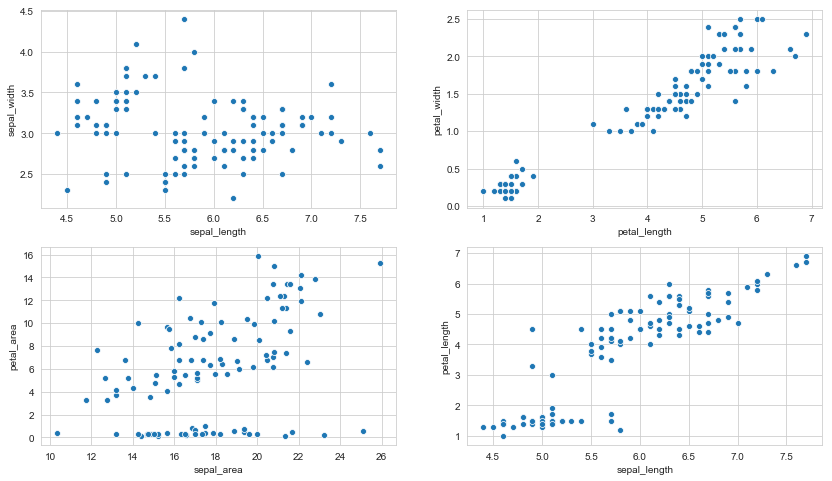

In [31]:
# Create 4 subplots (2 rows x 2 columns) of scatterplots

# sepal_length x sepal_width
# petal_length x petal_width
# sepal_area x petal_area
# sepal_length x petal_length

# Make your figure size 14 x 8. What are your takeaways?
# PETAL LENGTH AND WIDTH ARE CORRELATED STRONGLY.
# PETAL LENGTH AND SEPAL LENGTH ARE CORRELATED STRONGLY.
# PETAL AREA AND SEPAL AREA ARE CORRELATED WEAKLY.

fig = plt.figure(figsize=(14,8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='sepal_length', y='sepal_width', data=train_df)

plt.subplot(2, 2, 2)
sns.scatterplot(x='petal_length', y='petal_width', data=train_df)

plt.subplot(2, 2, 3)
sns.scatterplot(x='sepal_area', y='petal_area', data=train_df)

plt.subplot(2, 2, 4)
sns.scatterplot(x='sepal_length', y='petal_length', data=train_df)

plt.show()



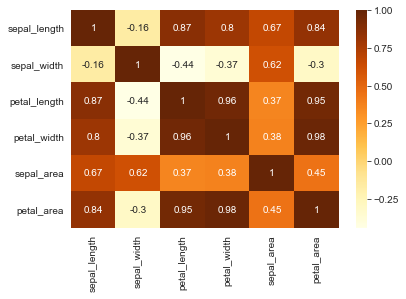

In [39]:
# Create a heatmap of each variable layering correlation coefficient on top.
sns.heatmap(train_df.drop(columns=['measurement_id','species_id']).corr(), cmap='YlOrBr', annot=True)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


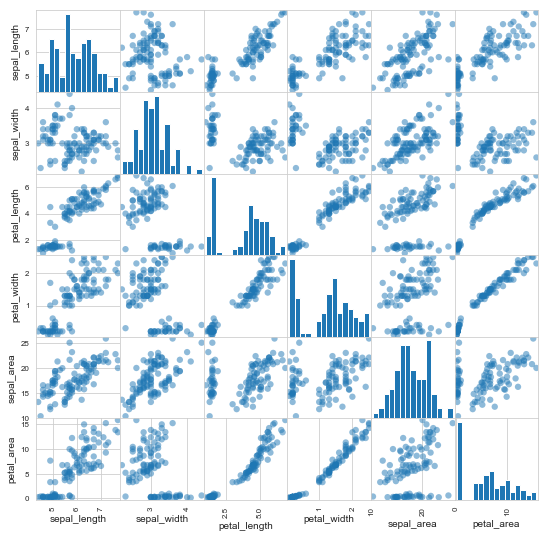

In [40]:
# Create a scatter matrix visualizing the interaction of each variable

from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(
    train_df.drop(columns=['measurement_id','species_id']), marker='o', s=40,
    hist_kwds={'bins':15},  figsize=(9,9), cmap=cmap)

In [41]:
train_df.head(20)

,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,sepal_area,petal_area
114,virginica,115,5.8,2.8,5.1,2.4,3,16.24,12.24
136,virginica,137,6.3,3.4,5.6,2.4,3,21.42,13.44
53,versicolor,54,5.5,2.3,4.0,1.3,2,12.65,5.20
19,setosa,20,5.1,3.8,1.5,0.3,1,19.38,0.45
38,setosa,39,4.4,3.0,1.3,0.2,1,13.20,0.26
110,virginica,111,6.5,3.2,5.1,2.0,3,20.80,10.20
23,setosa,24,5.1,3.3,1.7,0.5,1,16.83,0.85
9,setosa,10,4.9,3.1,1.5,0.1,1,15.19,0.15
86,versicolor,87,6.7,3.1,4.7,1.5,2,20.77,7.05
91,versicolor,92,6.1,3.0,4.6,1.4,2,18.30,6.44


In [50]:
veri = train_df[train_df.species_name == 'versicolor']
# veri[['sepal_length']]
virg = train_df[train_df.species_name == 'virginica']
# virg[['sepal_length']]


In [52]:
# Is the sepal length significantly different in virginica than versicolor? Run an experiment to test this.
# must include null hypothesis, alternative hyp, t-test, results, summary

# NULL HYP, H0: the difference in sepal length between virginica and versicolor is insignificant.

# ALT HYP, Ha: the difference in sepal length between virginica and versicolor is substantial.

# We will test if the sepal length of virginica is significantly different than that of the versicolor.

# If there is difference, then variable sepal_length is a good choice to keep as a feature.
# We can use a t-test here, as sepal_length is somwhat normally distributed.
import scipy as sp 
import numpy as np

sp.stats.ttest_ind(veri['sepal_length'],virg['sepal_length'])



Ttest_indResult(statistic=-4.232219188580116, pvalue=6.811720108343317e-05)

## The t-test results show that the p-value is very close to 0, which means it is reliable. The t-stat is -4.3 meaning the difference is 4.3X different. The value sepal_length between two different species, Versicolor and Virginica.